In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [2]:
xrp= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\xrp.csv')

In [3]:
xrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [4]:
xrp.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,0.535162,2.548526e+10,3.456579e+09
std,0.315802,1.480397e+10,4.292675e+09
min,0.137830,6.028785e+09,2.316223e+08
25%,0.294261,1.320264e+10,1.327525e+09
50%,0.449778,2.167631e+10,2.154086e+09
75%,0.718400,3.481536e+10,3.759254e+09
max,1.837677,8.438906e+10,6.246813e+10


In [5]:
xrp['FECHAS']=pd.to_datetime(xrp['FECHAS'])

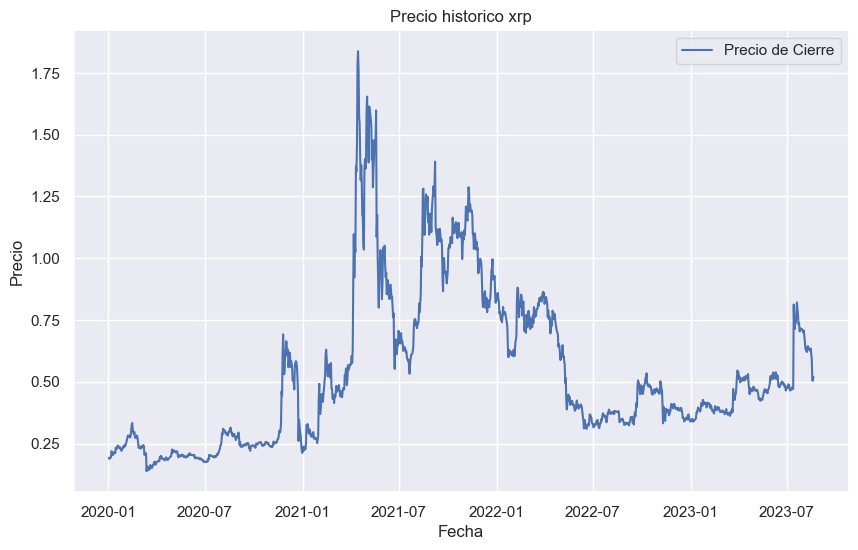

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(xrp['FECHAS'], xrp['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico xrp')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

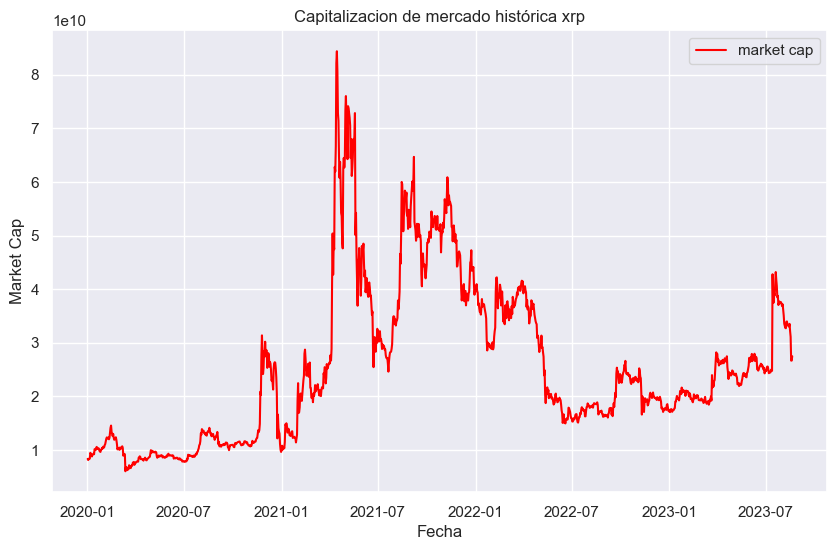

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(xrp['FECHAS'], xrp['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica xrp')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

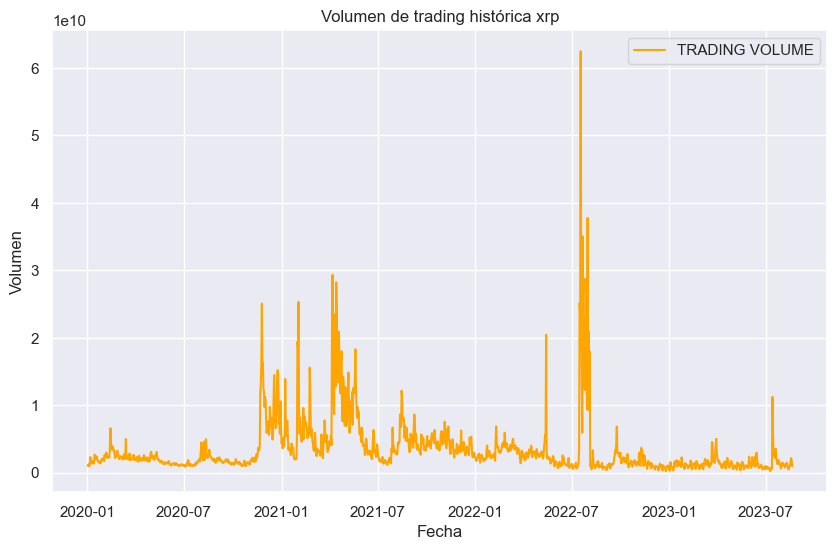

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(xrp['FECHAS'], xrp['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica xrp')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(xrp['PRECIO-usd'], window=rsi_period)
xrp['RSI'] = indicator.rsi()

xrp.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,0.609330,3.215351e+10,1.200449e+09,ripple,39.577266
1323,2023-08-17,0.589253,3.111217e+10,1.563956e+09,ripple,35.577755
1324,2023-08-18,0.504536,2.666622e+10,2.195107e+09,ripple,24.381651
1325,2023-08-19,0.505539,2.667860e+10,1.918959e+09,ripple,24.683756
1326,2023-08-20,0.519734,2.747779e+10,9.296988e+08,ripple,29.007709


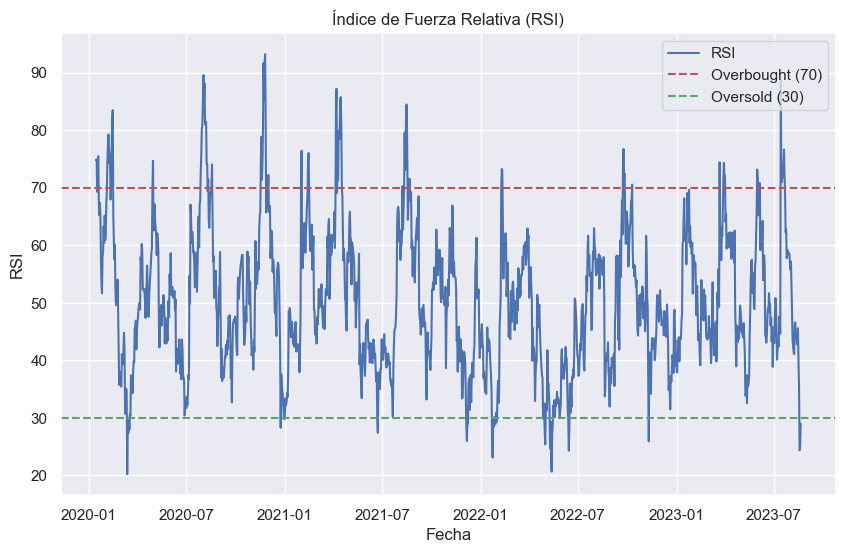

In [10]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(xrp['FECHAS'], xrp['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
rolling_window = 50
xrp['MovingAverage'] = xrp['PRECIO-usd'].rolling(window=rolling_window).mean()

print(xrp.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES COIN_ID  RSI  \
0 2020-01-02    0.192556    8.341959e+09   1.043386e+09  ripple  NaN   
1 2020-01-03    0.187433    8.125379e+09   1.082069e+09  ripple  NaN   
2 2020-01-04    0.192299    8.347737e+09   1.276806e+09  ripple  NaN   
3 2020-01-05    0.192812    8.353409e+09   9.874215e+08  ripple  NaN   
4 2020-01-06    0.193816    8.392968e+09   1.151984e+09  ripple  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


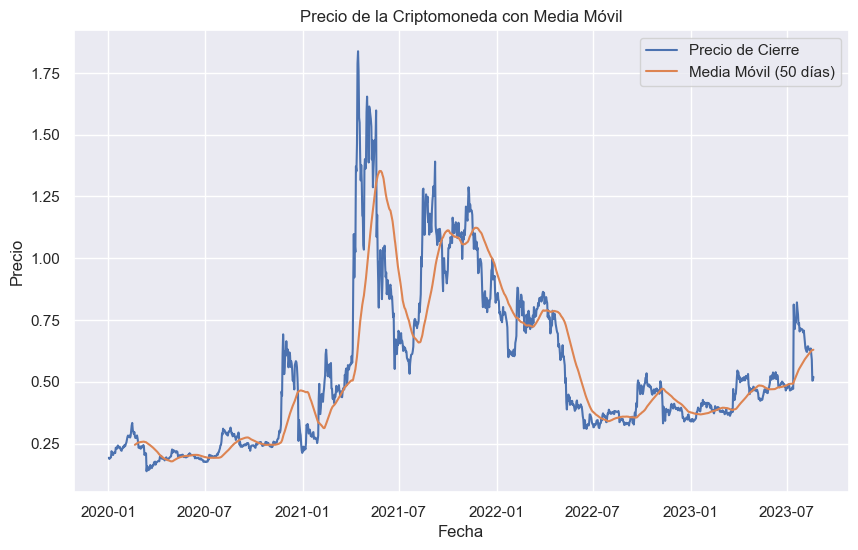

In [12]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(xrp['FECHAS'], xrp['PRECIO-usd'], label='Precio de Cierre')
plt.plot(xrp['FECHAS'], xrp['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

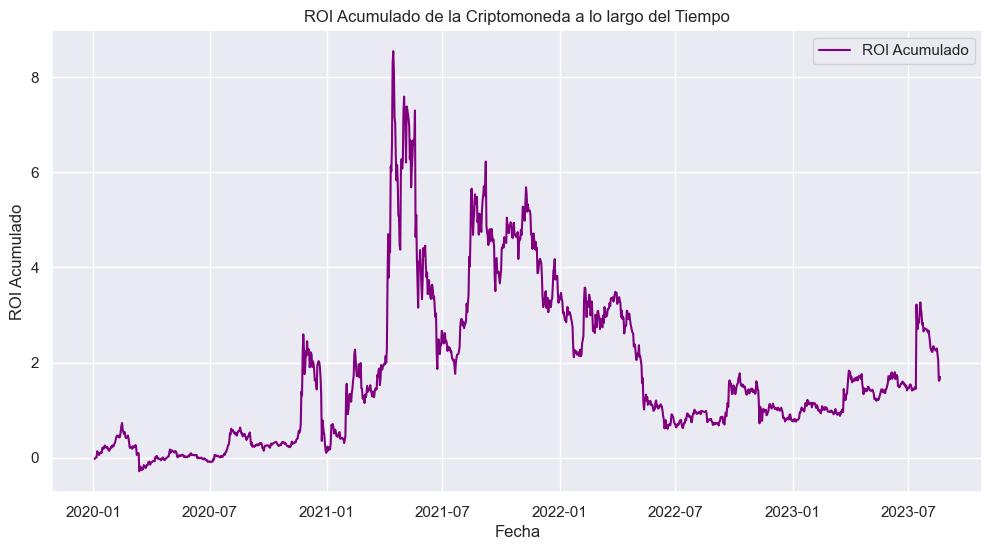

ROI Anualizado: 31.46%


In [13]:
# Calcular el ROI diario
xrp['ROI Diario'] = xrp['PRECIO-usd'].pct_change()

# Calcular el ROI acumulado
xrp['ROI Acumulado'] = xrp['ROI Diario'].add(1).cumprod().sub(1)

# Calcular el número de años transcurridos
fecha_inicial = xrp['FECHAS'].iloc[0]
fecha_final = xrp['FECHAS'].iloc[-1]
anios_transcurridos = (fecha_final - fecha_inicial).days / 365.25  # Usamos 365.25 para considerar años bisiestos

# Calcular el ROI anualizado
roi_anualizado = (xrp['ROI Acumulado'].iloc[-1] + 1) ** (1 / anios_transcurridos) - 1

# Crear un gráfico de ROI acumulado a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(xrp['FECHAS'], xrp['ROI Acumulado'], label='ROI Acumulado', color='purple')
plt.xlabel('Fecha')
plt.ylabel('ROI Acumulado')
plt.title('ROI Acumulado de la Criptomoneda a lo largo del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el ROI anualizado
print(f'ROI Anualizado: {roi_anualizado:.2%}')

In [14]:
xrp.to_csv('xrpDB.csv', index=False)